In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
sep = os.sep
import torch
%load_ext autoreload
%autoreload 2

In [2]:
os.chdir('/home/ak/PycharmProjects/ature')
from neuralnet.utils.measurements import get_best_f1_thr

In [3]:
train_val = pd.read_csv('net_logs'+sep+'unet-DRIVE.chk.tar.csv', index_col='TYPE')
val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])
train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])
test= pd.read_csv('net_logs'+sep+'unet-DRIVE.chk.tar-TEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

In [4]:
train_val1 = pd.read_csv('net_logs'+sep+'patchnet-DRIVE.chk.tar.csv', index_col='TYPE')
val1 = train_val1.query('TYPE==1')
T_val1 = np.arange(val1.shape[0])
train1 = train_val1.query('TYPE==0')
T_train1 =np.arange(train1.shape[0])
test1= pd.read_csv('net_logs'+sep+'patchnet-DRIVE.chk.tar-TEST.csv', index_col='TYPE')
T_test1 = np.arange(test1.shape[0])

/home/ak/anaconda3/envs/ature_env/lib/python3.6/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Validation Precision-Recall

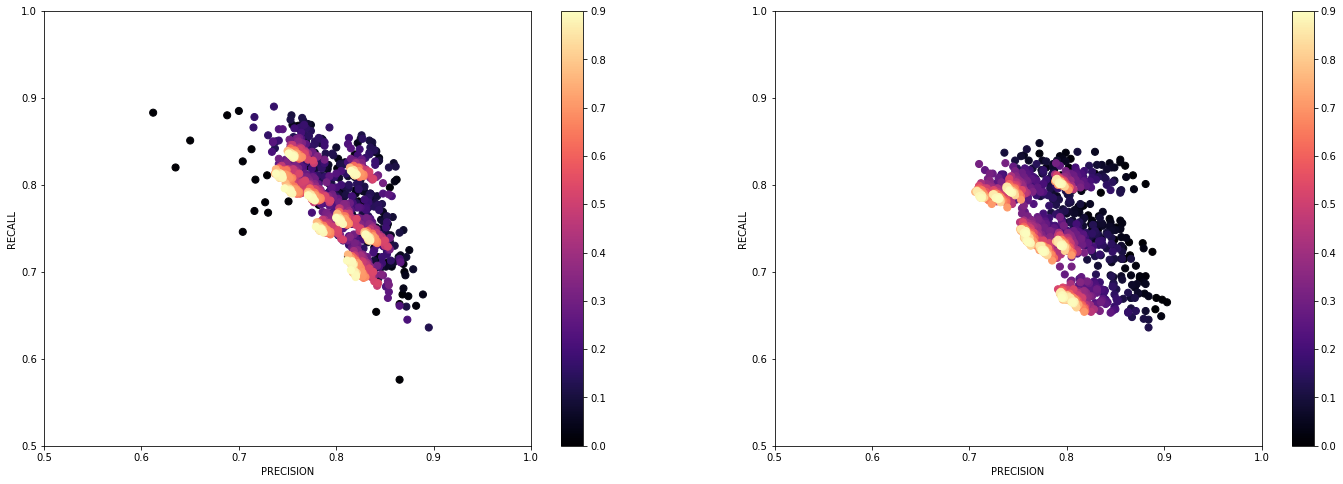

In [5]:
plt.rcParams["figure.figsize"] = [24,8]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, val['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, val1['PRECISION'].shape[0])
plots = val.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = val1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Validation F1 Score

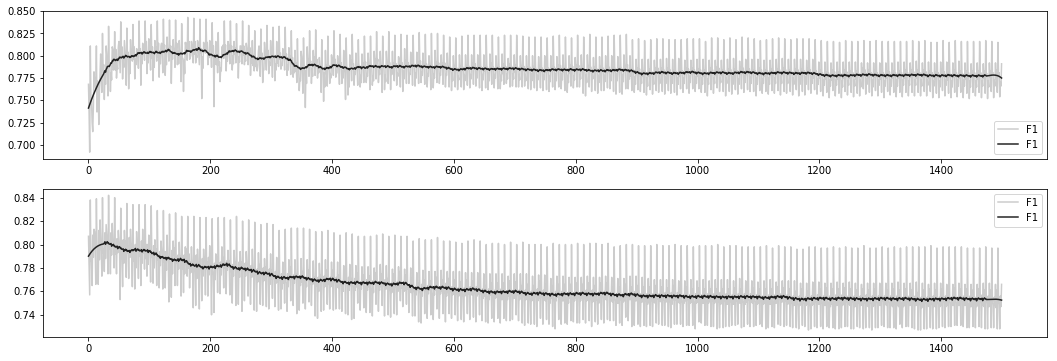

In [6]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['F1'] = savgol_filter(df['F1'], 51, 3)
df1['F1'] = savgol_filter(df1['F1'], 51, 3)
plots = val.plot(y='F1', x=T_val, c='#cccccc', ax=ax1)
plots = df.plot(y='F1', x=T_val, c='#222222', ax=ax1)
plots = val1.plot(y='F1', x=T_val1, c='#cccccc', ax=ax2)
plots = df1.plot(y='F1', x=T_val1, c='#222222', ax=ax2)
plt.show()

### Validation Accuracy

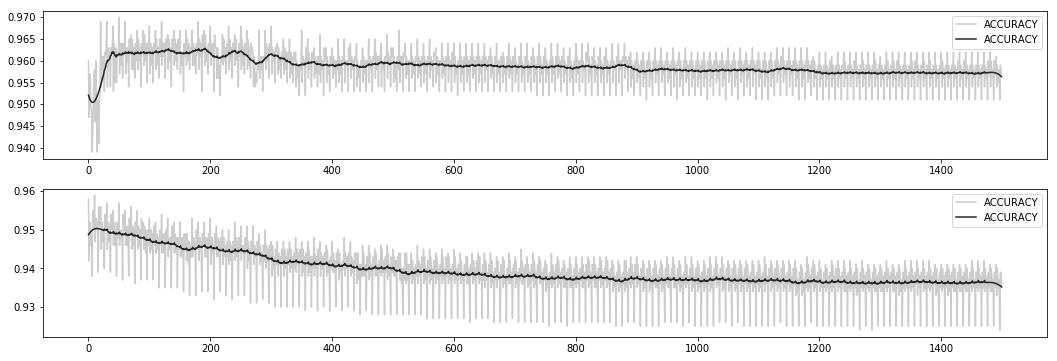

In [7]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = val.copy(), val1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
plots = val.plot(y='ACCURACY', x=T_val, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_val, c='#222222', ax=ax1)
plots = val1.plot(y='ACCURACY', x=T_val1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_val1, c='#222222', ax=ax2)
plt.show()

### Training F1 Score

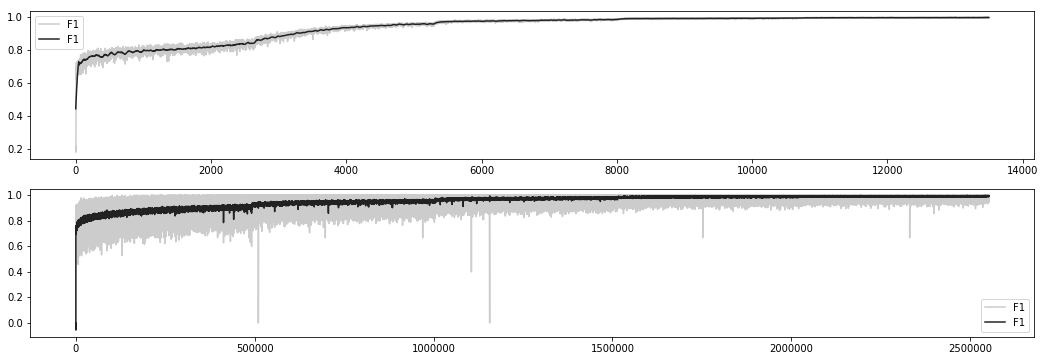

In [8]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['F1'] = savgol_filter(df['F1'], 91, 2)
df1['F1'] = savgol_filter(df1['F1'], 91, 2)
plots = train.plot(y='F1', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='F1', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='F1', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='F1', x=T_train1, c='#222222', ax=ax2)
plt.show()

### Training precision-recall

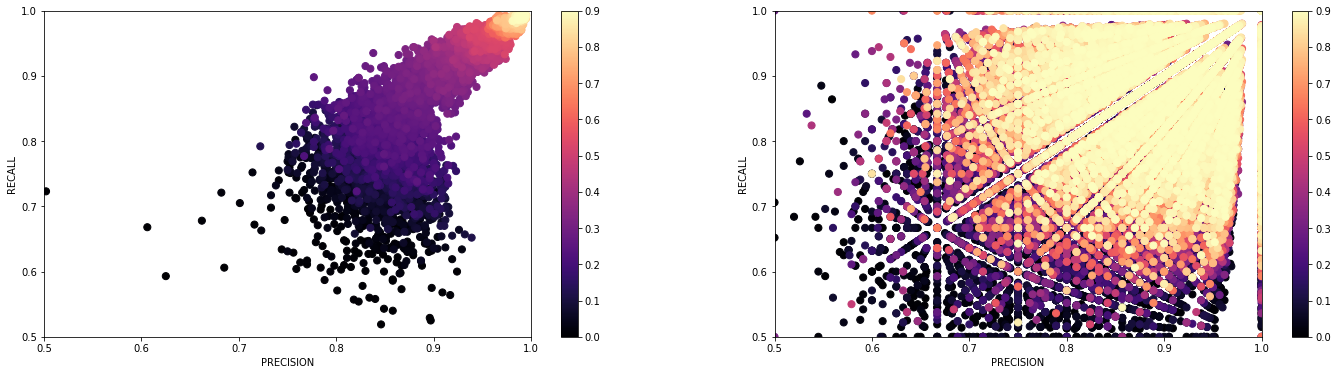

In [11]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
z = np.linspace(0,0.9, train['PRECISION'].shape[0])
z1 = np.linspace(0,0.9, train1['PRECISION'].shape[0])
plots = train.plot.scatter(x='PRECISION', y='RECALL', c=z, colormap='magma', ax=ax1, s=50, xlim=(0.5,1), ylim=(0.5,1))
plots = train1.plot.scatter(x='PRECISION', y='RECALL', c=z1, colormap='magma', ax=ax2, s=50,  xlim=(0.5,1), ylim=(0.5,1))
plt.show()

### Training loss

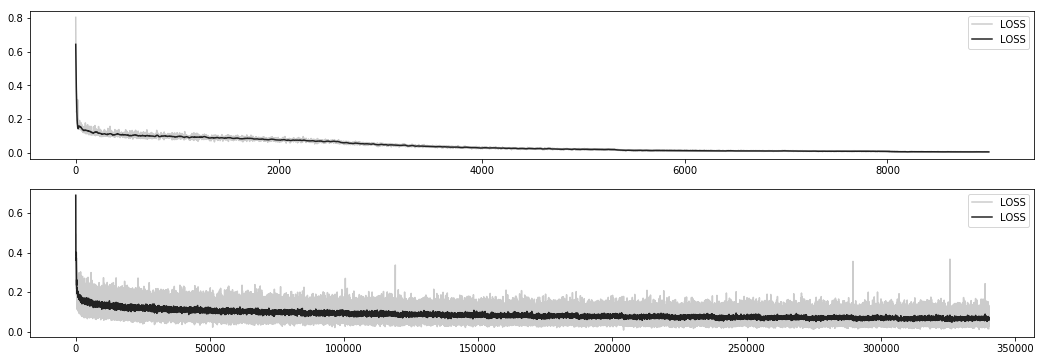

In [12]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['LOSS'] = savgol_filter(df['LOSS'], 51, 3)
df1['LOSS'] = savgol_filter(df1['LOSS'], 51, 3)
plots = train.plot(y='LOSS', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='LOSS', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='LOSS', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='LOSS', x=T_train1, c='#222222', ax=ax2)
plt.show()

### Training Accuracy

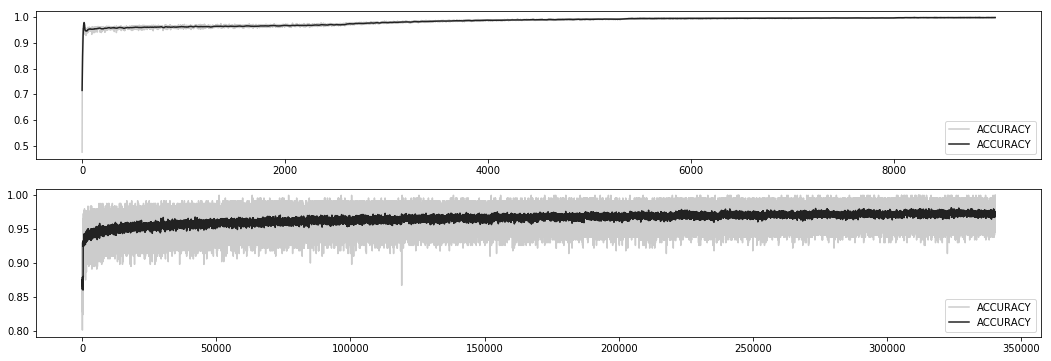

In [13]:
plt.rcParams["figure.figsize"] = [18,6]
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
df, df1 = train.copy(), train1.copy()
df['ACCURACY'] = savgol_filter(df['ACCURACY'], 51, 3)
df1['ACCURACY'] = savgol_filter(df1['ACCURACY'], 51, 3)
plots = train.plot(y='ACCURACY', x=T_train, c='#cccccc', ax=ax1)
plots = df.plot(y='ACCURACY', x=T_train, c='#222222', ax=ax1)
plots = train1.plot(y='ACCURACY', x=T_train1, c='#cccccc', ax=ax2)
plots = df1.plot(y='ACCURACY', x=T_train1, c='#222222', ax=ax2)
plt.show()

### TEST F1 Score

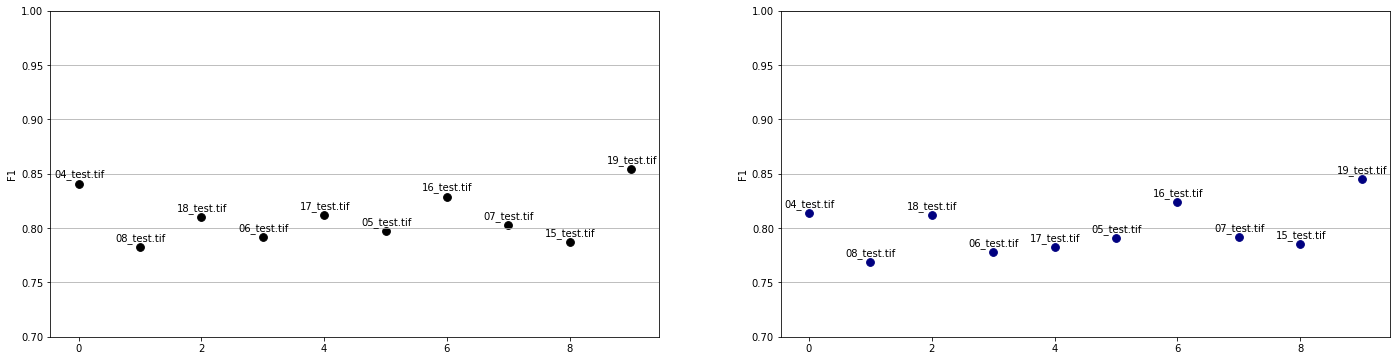

In [9]:
plt.rcParams["figure.figsize"] = [24,6]
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(T_test, test['F1'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.4, test['F1'].iloc[i]+0.006))
ax1.set_ylabel('F1')
ax1.set_ylim(0.7, 1)
ax1.grid(True, axis='y')

ax2.scatter(T_test1, test1['F1'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['F1'].iloc[i]), xytext=(T_test1[i]-0.4, test1['F1'].iloc[i]+0.006))
ax2.set_ylabel('F1')
ax2.set_ylim(0.7, 1)
ax2.grid(True, axis='y')

plt.show()

### TEST precision-recall

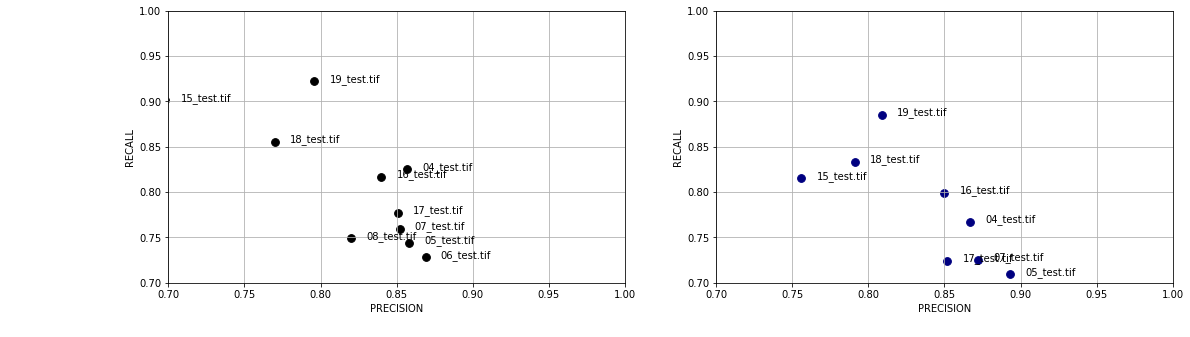

In [10]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(test['PRECISION'], test['RECALL'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
ax1.set_xlabel('PRECISION')
ax1.set_ylabel('RECALL')
ax1.set_xlim((0.7, 1))
ax1.set_ylim((0.7, 1))
ax1.grid(True)

ax2.scatter(test1['PRECISION'], test1['RECALL'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (test1['PRECISION'].iloc[i]+0.01, test1['RECALL'].iloc[i]))
ax2.set_xlabel('PRECISION')
ax2.set_ylabel('RECALL')
ax2.set_xlim((0.7, 1))
ax2.set_ylim((0.7, 1))
ax2.grid(True)

plt.show()

### Test Accuracy

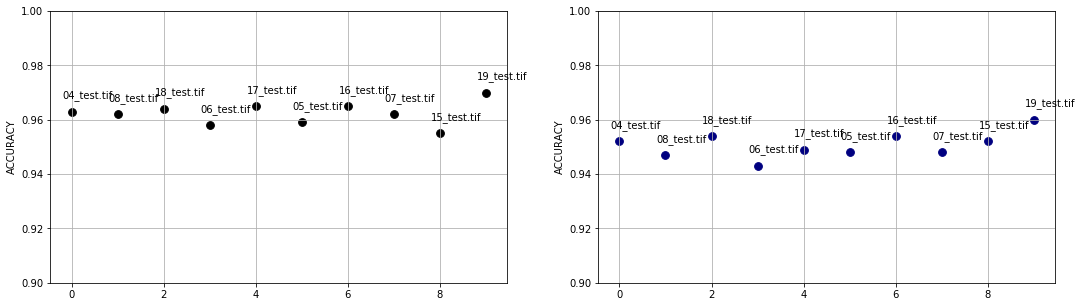

In [11]:
plt.rcParams["figure.figsize"] = [18,5]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(T_test, test['ACCURACY'], color='black', s=60)
for i, txt in enumerate(test['ID']):
    ax1.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.005))
ax1.set_ylabel('ACCURACY')
ax1.set_ylim((0.9, 1))
ax1.grid(True)

ax2.scatter(T_test1, test1['ACCURACY'], color='navy', s=60)
for i, txt in enumerate(test1['ID']):
    ax2.annotate(txt, (T_test1[i], test1['ACCURACY'].iloc[i]), xytext=(T_test1[i]-0.2, test1['ACCURACY'].iloc[i]+0.005))
ax2.set_ylabel('ACCURACY')
ax2.set_ylim((0.9, 1))
ax2.grid(True)

plt.show()

### MST

In [3]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ '1st_manual'
Dirs['segmented'] = 'data'+sep+'DRIVE' +sep+ 'segmented_unet'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '19_test.tif'
###### Path end #####
params = {'sk_threshold': 100,
          'alpha': 5.0,
          'orig_contrib': 0.6,
          'seg_threshold': 12}

In [4]:
f1s = []
for input_image in os.listdir(Dirs['images']):
    img_obj = SegmentedImage()

    img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
    img_obj.working_arr = img_obj.image_arr[:,:,1]
    img_obj.apply_clahe()
    img_obj.res['orig'] = img_obj.working_arr

    img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ input_image +'.png', channels=1)
    img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
    img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
    img_obj.apply_mask()
#     img_obj.generate_skeleton(threshold=params['sk_threshold'])
    img_obj.working_arr[img_obj.mask == 0] = 255
    scores, thr = get_best_f1_thr(255-img_obj.working_arr, img_obj.ground_truth, for_best='F1')
    print(input_image, scores['F1'], thr)
    f1s.append(scores['F1'])
#     print(ss.values())

15_test.tif 0.8133754894365461 158.0
04_test.tif 0.8304632631010264 118.0
19_test.tif 0.8791824005711173 174.0
08_test.tif 0.806528890160183 103.0
06_test.tif 0.8137575671361057 89.0
18_test.tif 0.8279645950027721 153.0
07_test.tif 0.8195416448843993 102.0
16_test.tif 0.8432620603743962 127.0
05_test.tif 0.8204242962006938 87.0
17_test.tif 0.8213502928389206 108.0


In [5]:
np.array(f1s).mean()

0.8275850499706159

In [12]:
img_obj.file_name

'17_test.tif'

In [72]:
chunks = imgutils.get_chunk_indexes(img_obj.working_arr.shape, (10,10))

In [ ]:
pieces = []
for ch in chunks:
    i = 255-img_obj.working_arr[ch[0]:ch[1],ch[2]:ch[3]].copy()
    y = img_obj.ground_truth[ch[0]:ch[1],ch[2]:ch[3]].copy()
#     break
    scores, thr = get_best_f1_thr(i, y, for_best='F1')
#     if scores['F1'] > 0.0:
#         i[i > thr] = 255
#         i[i <= thr] = 0
#     else:
#         i[i!=-1]=0
    i[i > thr] = 255
    i[i <= thr] = 0
    pieces.append(i)
#     print(scores['F1'], thr)

In [71]:
pieces = np.array(pieces)
m=imgutils.merge_patches(pieces, img_obj.working_arr.shape, (10,10))

IndexError: too many indices for array

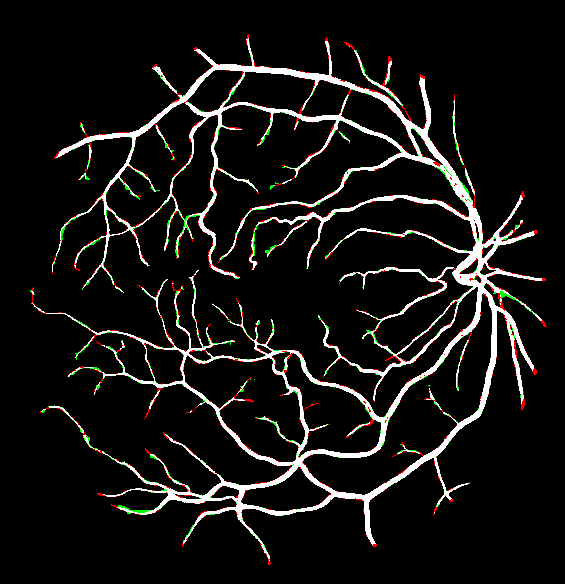

In [68]:
IMG.fromarray(imgutils.get_rgb_scores(255-m, img_obj.ground_truth))

In [67]:
imgutils.get_praf1(255-m,img_obj.ground_truth)

{'Accuracy': 0.9828676203176142,
 'F1': 0.8956645318469575,
 'Precision': 0.9215693721751681,
 'Recall': 0.8711762171477812}

In [11]:
import math as mth
def get_cost(p, q):
    i_diff = max(p, q)
    cost = mth.pow(mth.e, 5 * (i_diff / 255))
#     print(cost)
    return round(cost, 3)
d4 = []
dgt = []
cmap=[]
img = img_obj.image_arr[:,:,1]
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        point = []
#         for x in range(img.shape[0]):
#             for y in range(img.shape[1]):
#                 if gt[x,y] ==0:
#                     continue
#                 point.append(get_cost(img[i, j], gt[x, y]))
        if img_obj.ground_truth[i,j]==255:
            dgt.append([i, j, 1.0*img[i, j] + 0.0*img_obj.res['orig'][i,j]])
            d4.append([0, 0, 0])
        else:
            d4.append([i, j, 1.0*img[i, j] + 0.0*img_obj.res['orig'][i,j]])
            dgt.append([0, 0, 0])
        cmap.append(0 if img_obj.ground_truth[i,j]==255 else img[i,j])
parr = np.array(d4)
pdgt = np.array(dgt)
# mean=np.mean(parr, axis=0, keepdims=True)
# std=np.std(parr,axis=0,keepdims=True)
# parrz = (parr-mean)/std
# parrz = parr

In [11]:
rgb = imgutils.get_rgb_scores(255-img_obj.working_arr, img_obj.ground_truth)

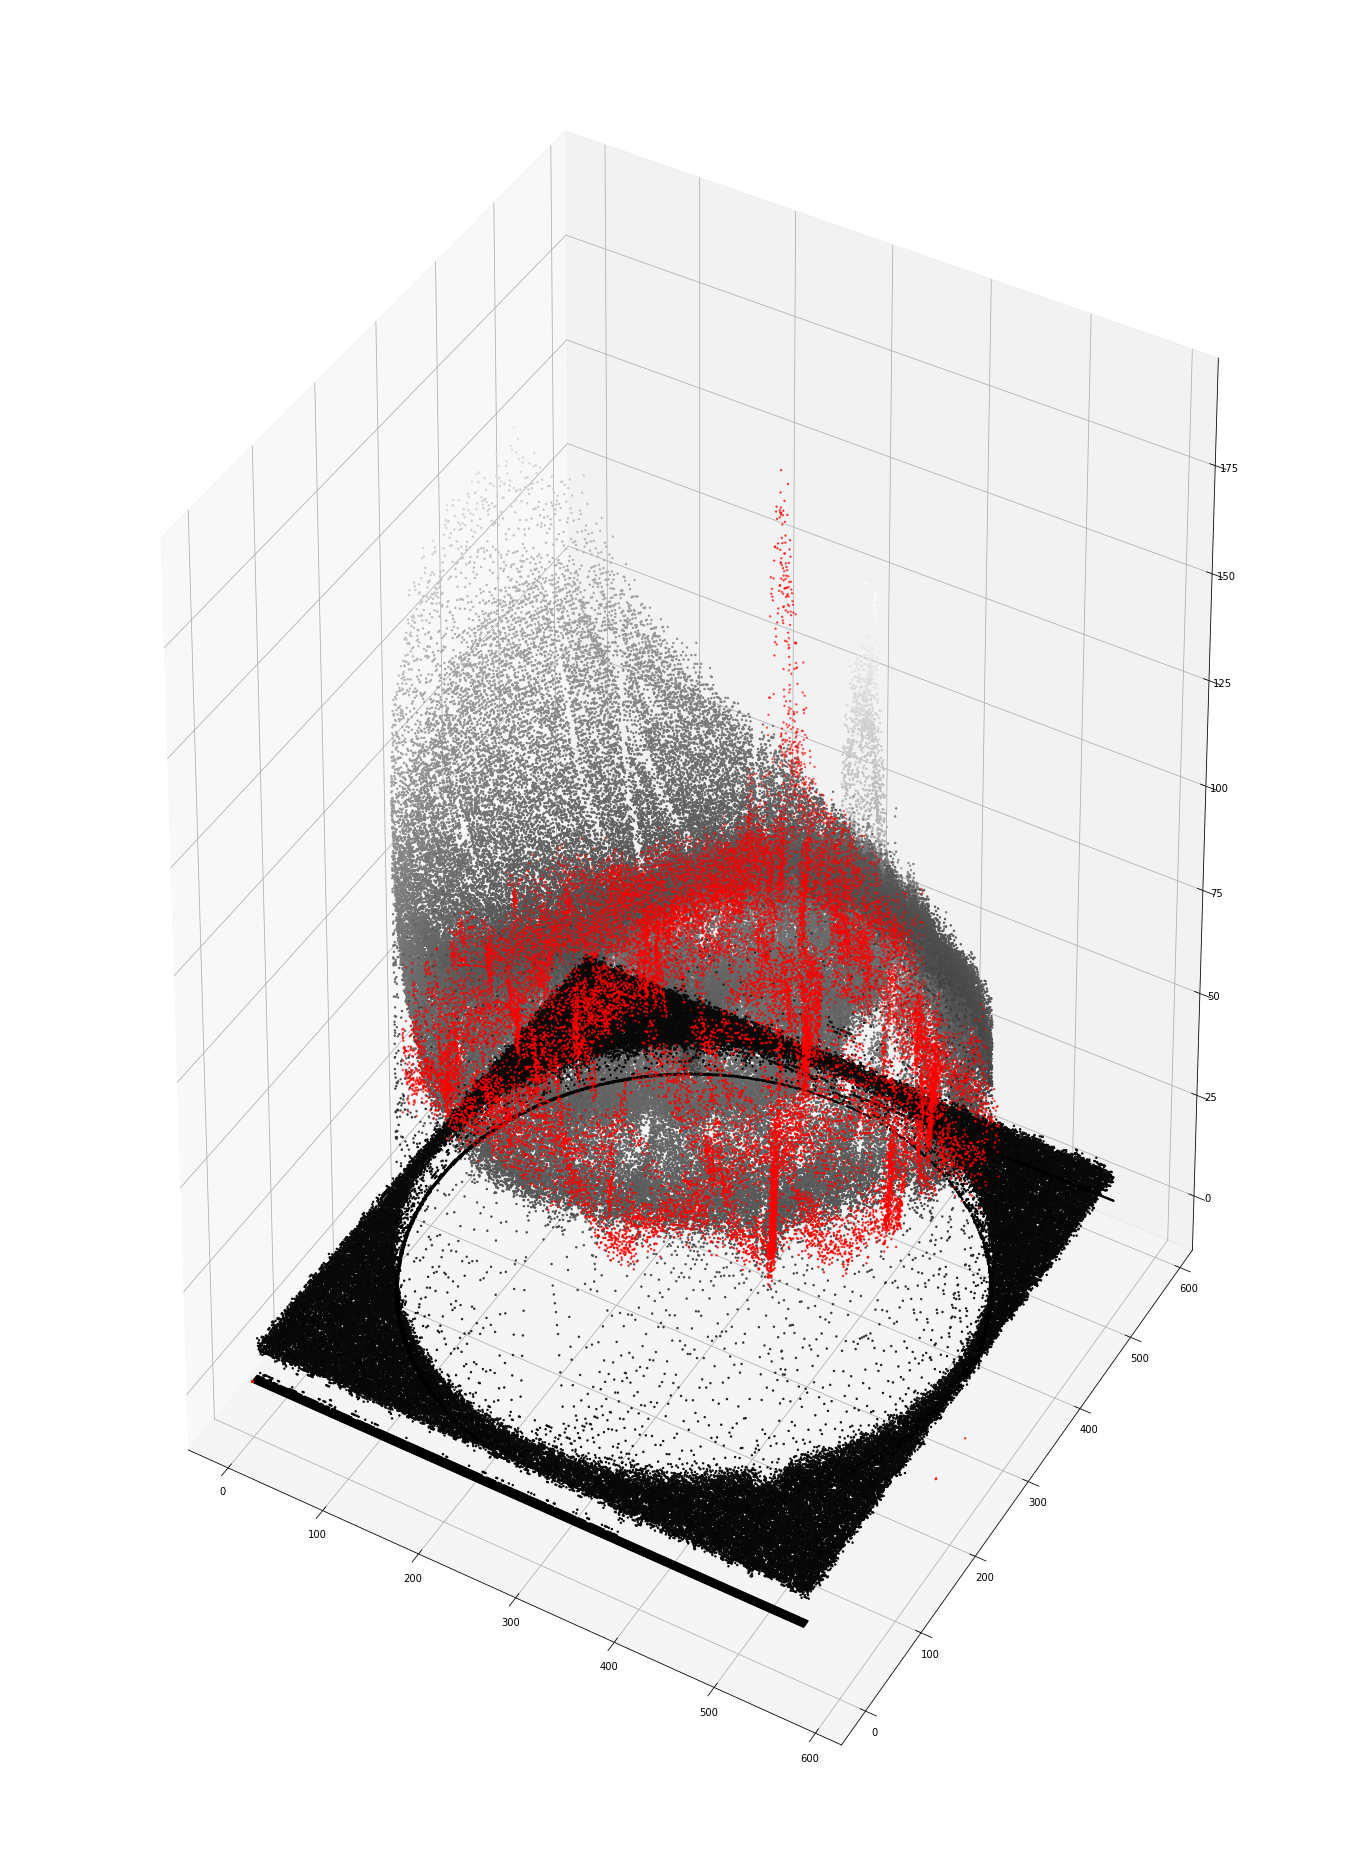

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [24,34]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = parr[:,0]
y = parr[:,1]
z = parr[:,2]
# c = parr[:,3]
ax.scatter(y, x, z, c=z, cmap='gray', depthshade=False, s=2)
ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
ax.grid(True, axis='z')
# ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
plt.show()

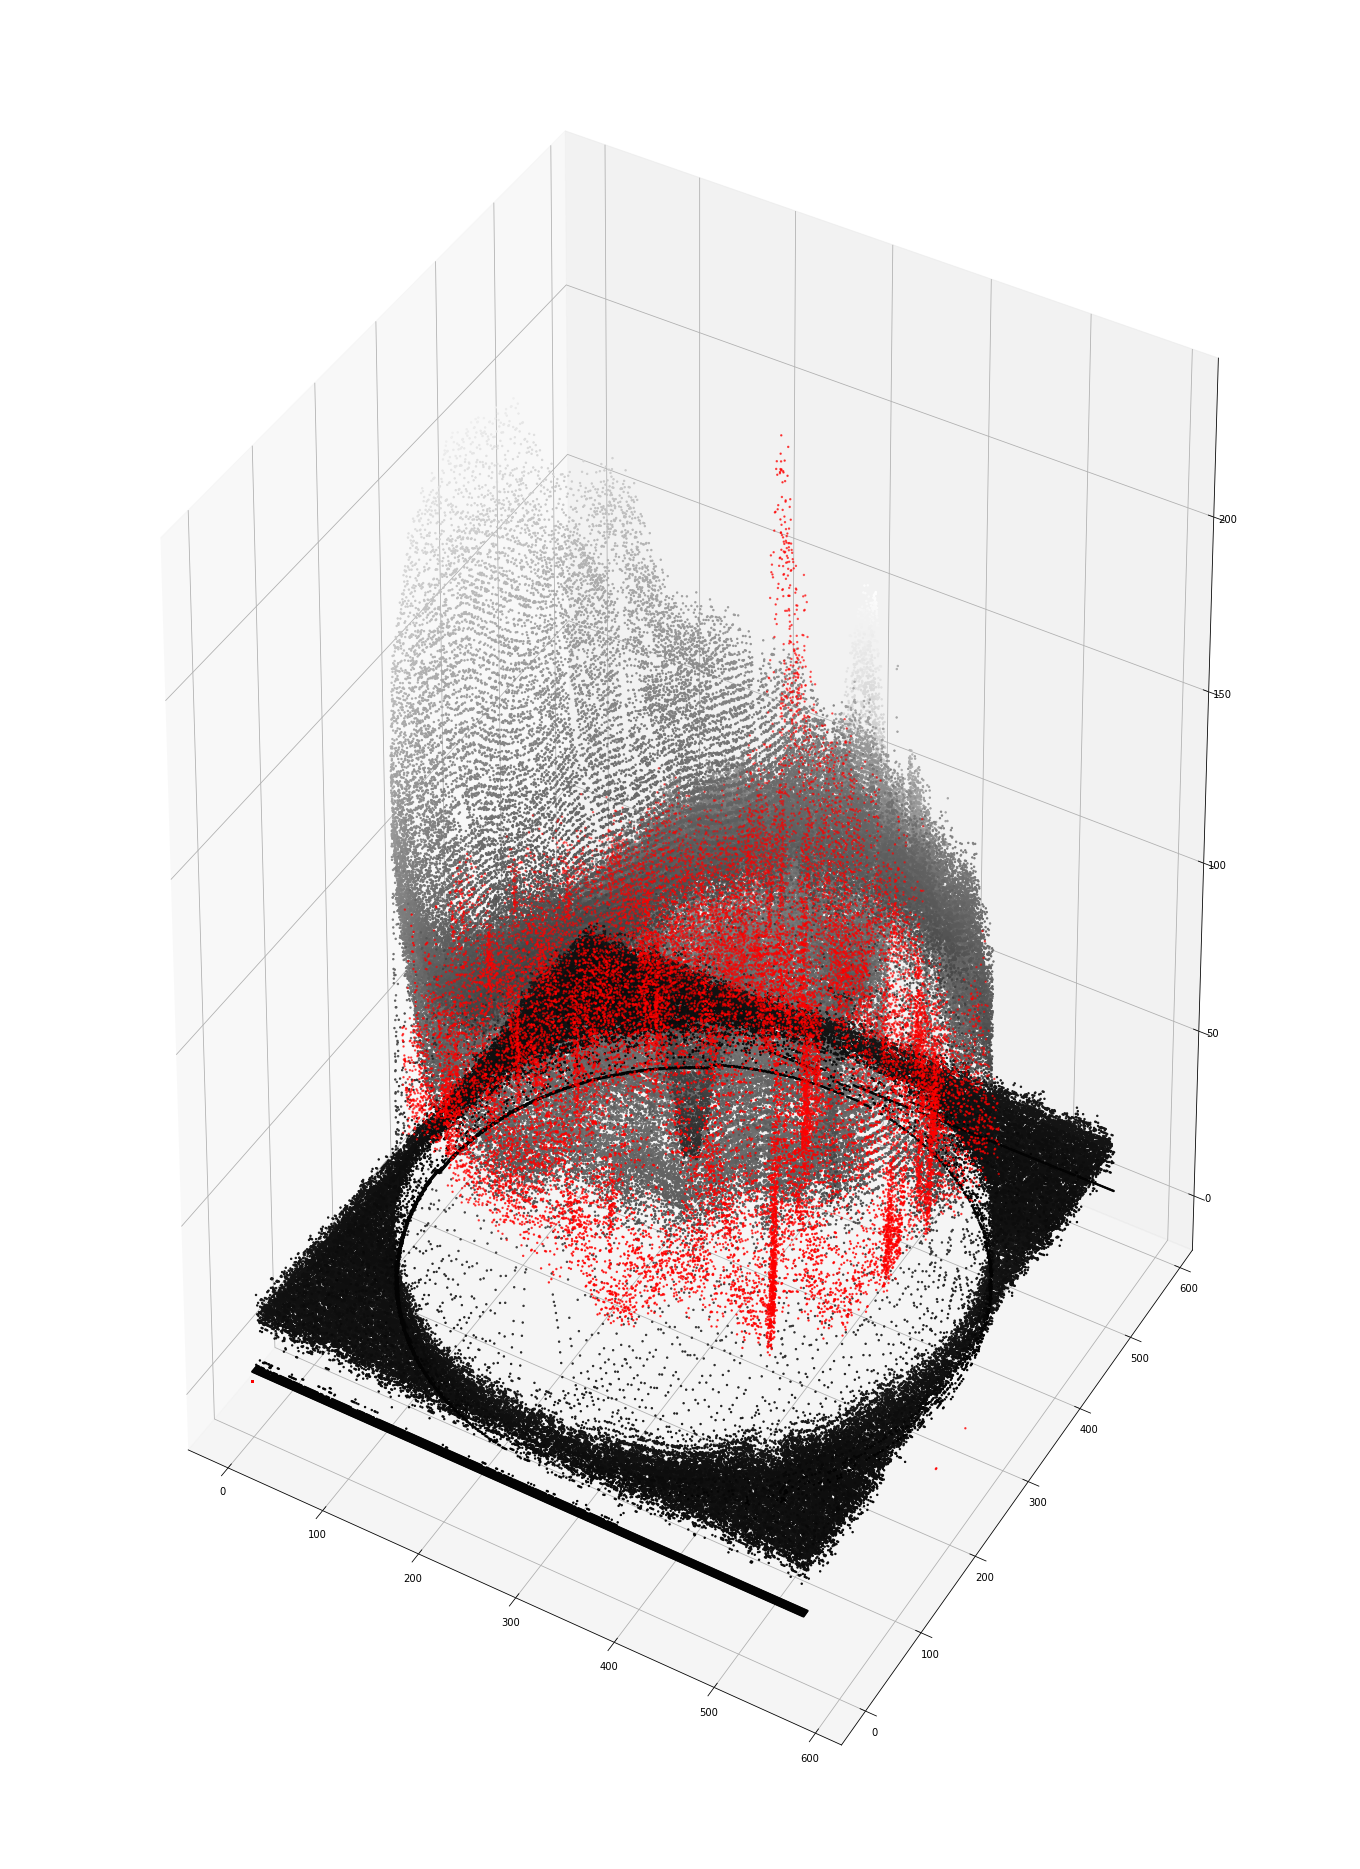

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [24,34]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = parr[:,0]
y = parr[:,1]
z = parr[:,2]
# c = parr[:,3]
ax.scatter(y, x, z, c=z, cmap='gray', depthshade=False, s=2)
ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
ax.grid(True, axis='z')
# ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
plt.show()

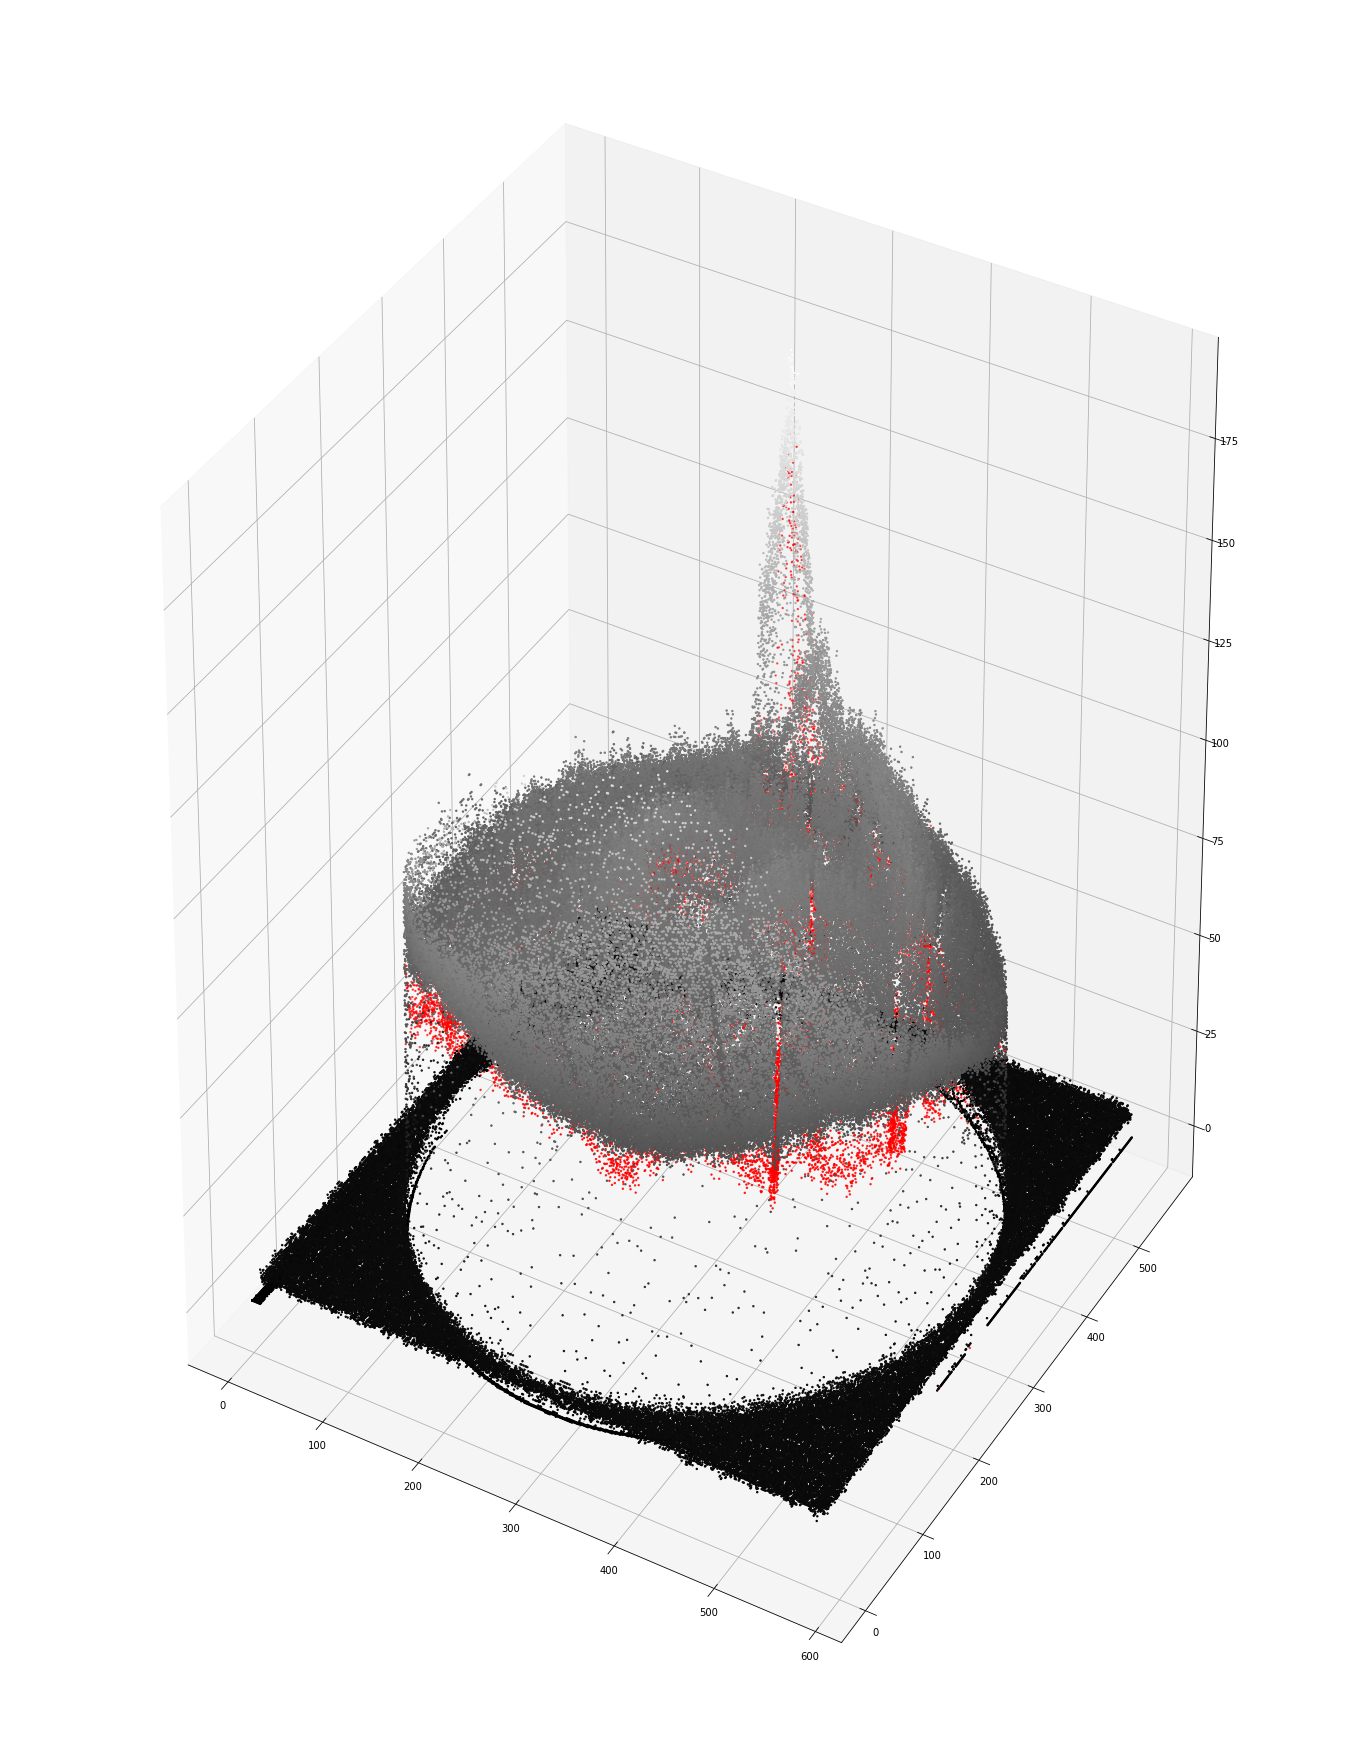

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [24,32]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = parr[:,0]
y = parr[:,1]
z = parr[:,2]
# c = parr[:,3]
ax.scatter(x, y, z, c=z, cmap='gray', depthshade=False, s=2)
ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
# ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
plt.show()

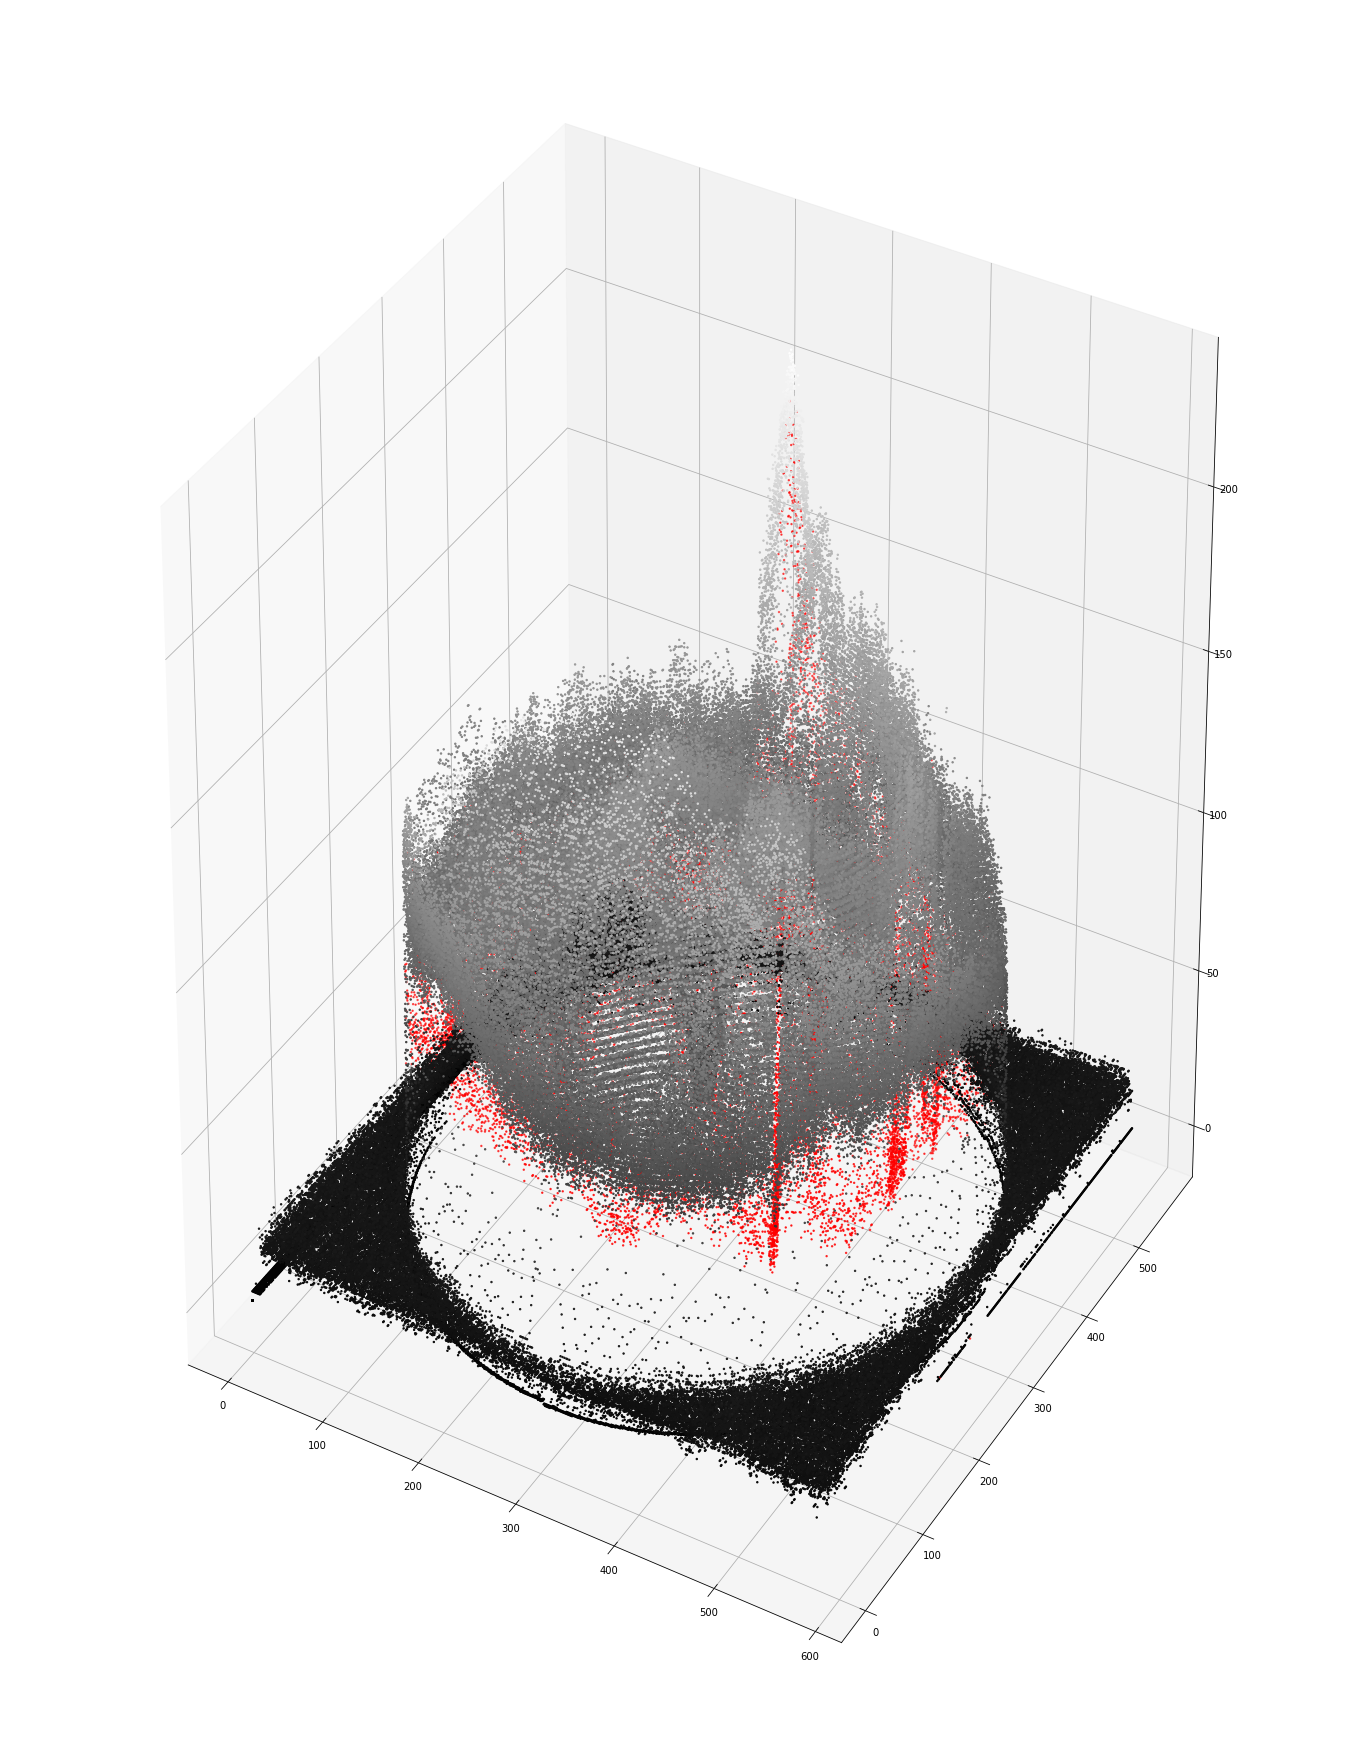

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [24,32]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = parr[:,0]
y = parr[:,1]
z = parr[:,2]
# c = parr[:,3]
ax.scatter(x, y, z, c=z, cmap='gray', depthshade=False, s=2)
ax.scatter(pdgt[:,0], pdgt[:,1], pdgt[:,2], c='red', s=2)
# ax.scatter(x, y, z, c=cmap, cmap=plt.hot(), depthshade=False, s=1)
plt.show()

In [27]:
thr = 255-img_obj.working_arr.copy()
thr[thr>150]=255
thr[thr<=150] = 0
imgutils.get_praf1(thr, img_obj.ground_truth)

{'Accuracy': 0.9785428536792339,
 'F1': 0.8737832923307305,
 'Precision': 0.853218674929499,
 'Recall': 0.8953637061123086}

In [ ]:
# tester = AtureTest(out_dir=Dirs['segmented'])
# tester.run(params=params, save_images=False, img_obj=img_obj)
# img_obj.res['scores']

In [13]:
thr = 255-img_obj.working_arr.copy()
thr[thr>150]=255
thr[thr<=150] = 0
imgutils.get_praf1(thr, img_obj.ground_truth)

{'Accuracy': 0.9785428536792339,
 'F1': 0.8737832923307305,
 'Precision': 0.853218674929499,
 'Recall': 0.8953637061123086}

In [15]:
i2=imgutils.get_rgb_scores(thr, img_obj.ground_truth)

In [16]:
thr = img_obj.working_arr.copy()
thr[thr>140]=255
thr[thr<=140] = 0
thr = 255-thr
imgutils.get_praf1(thr, img_obj.ground_truth)

{'Accuracy': 0.9711298339192629,
 'F1': 0.842576679005817,
 'Precision': 0.7692284481458013,
 'Recall': 0.9313872346644259}

In [17]:
i1 = imgutils.get_rgb_scores(thr, img_obj.ground_truth)

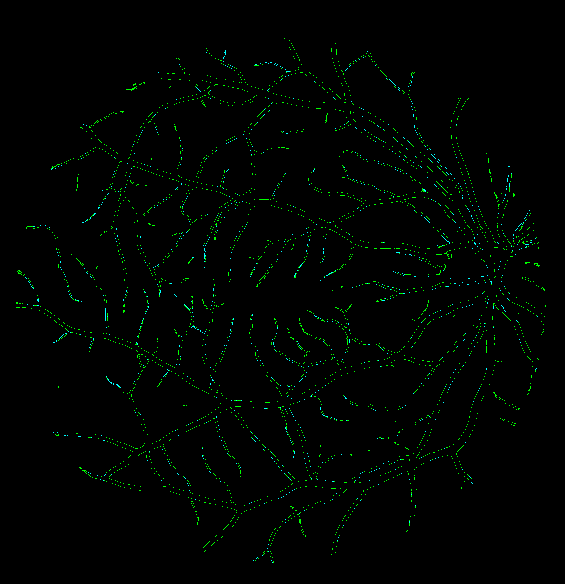

In [18]:
# IMG.fromarray(imgutils.get_rgb_scores(255-thr, img_obj.ground_truth))
IMG.fromarray(i1-i2)

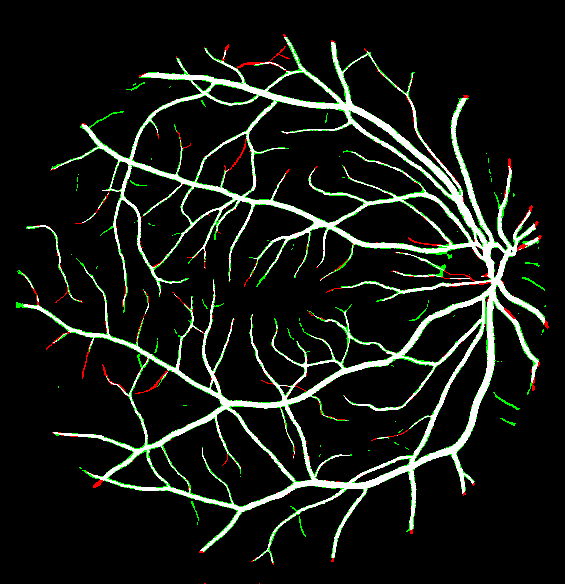

In [11]:
IMG.fromarray(imgutils.get_rgb_scores(thr, img_obj.ground_truth))

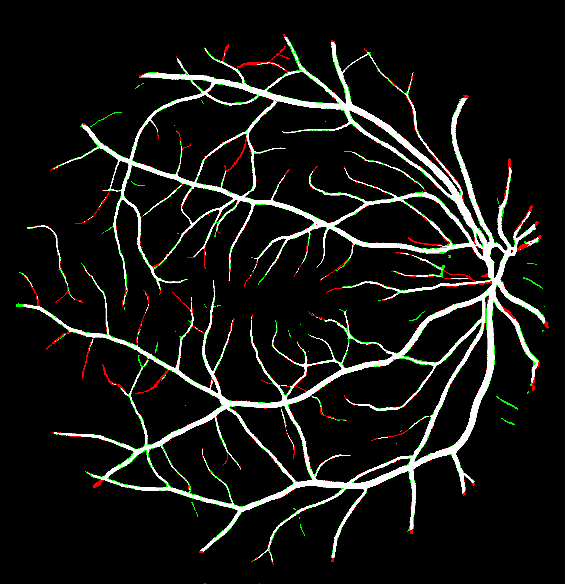

In [19]:
IMG.fromarray(i2)

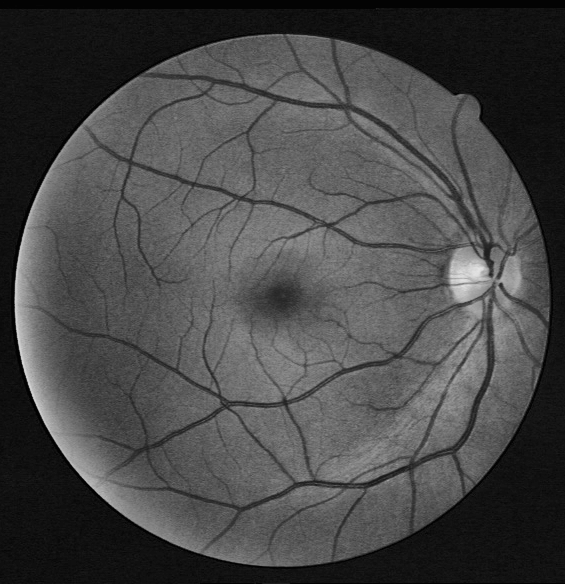

In [24]:
IMG.fromarray(img_obj.res['orig'])

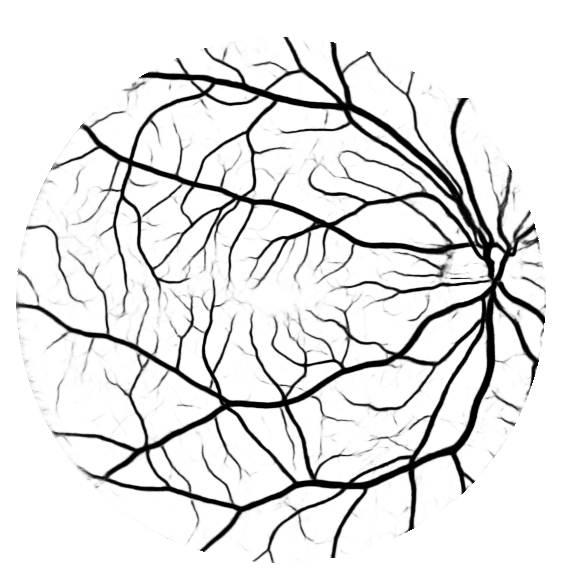

In [21]:
# img_obj.working_arr[img_obj.mask == 0] = 255
IMG.fromarray(img_obj.working_arr)

In [ ]:
imgutils.histogram(img_obj.working_arr)

In [ ]:
res = cv2.resize(img_obj.image_arr, dsize=(900, 900), interpolation=cv2.INTER_AREA)

In [88]:
ii = img[240:255,300:315]

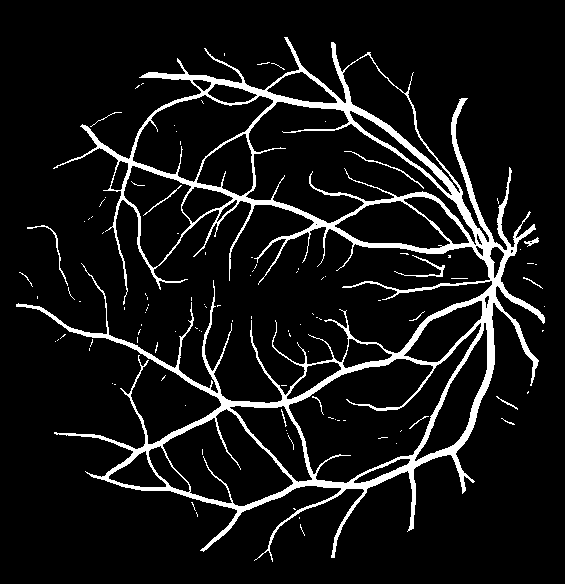

In [101]:
IMG.fromarray(255-thr)

In [28]:
thr[thr==255] =1
gt[gt==255]=1
y_true = torch.LongTensor(thr)
y_pred = torch.LongTensor(gt)
y_true = y_true * 2
y_cases = y_true + y_pred
tp = torch.sum(y_cases == 3).item()
fp = torch.sum(y_cases == 1).item()
tn = torch.sum(y_cases == 0).item()
fn = torch.sum(y_cases == 2).item()

In [9]:
thr.shape

(584, 565)

In [25]:
gt = img_obj.ground_truth.copy()

In [11]:
gt[gt==255]=1

In [12]:
gt = gt*2

In [13]:
gt.shape

(584, 565)

In [14]:
gt_case = thr+gt

In [15]:
gt_case.shape

(584, 565)

In [35]:
tp = gt_case[gt_case==3].shape[0]
fp = gt_case[gt_case==1].shape[0]
tn = gt_case[gt_case==0].shape[0]
fn = gt_case[gt_case==2].shape[0]

In [17]:
a 

(24507,)

In [29]:
p = tp/(tp+fp)

In [31]:
r = tp/(tp+fn)

In [33]:
print(p,r)

0.8953637061123086 0.853218674929499


# 